In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import scipy.stats as stats
plt.style.use('seaborn-v0_8')
%matplotlib inline

print("All packages imported successfully!")


All packages imported successfully!


In [21]:
df = pd.read_csv('../data/benin-malanville.csv')
df.shape
print('First 5 rows:')

df.head()


First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


###  Basic information about the dataset

In [22]:
print("=== DATASET INFO ===")
df.info()
print("===missing values===")
df.isnull().sum()
print("===basic statistics===")
df.describe()

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB   

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


##### Missing-Value Report

In [23]:
total_rows = len(df)
missing_percent = (df.isnull().sum() / total_rows * 100)
high_missing = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(high_missing)

Columns with >5% missing values:
Comments    100.0
dtype: float64


In [24]:

# drop the comments column since it's empty
df_clean = df.drop(columns=['Comments'])
print(f'Dataset shape after removing null column: {df_clean.shape}')

Dataset shape after removing null column: (525600, 18)


##### Median imputation

In [25]:
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH','ModA', 'ModB', 'WS', 'WSgust']

for col in key_columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].meadian(), inplace=True)

print("Missing values after cleaning:")
print(df_clean.isnull().sum())

Missing values after cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [26]:
df_clean.to_csv('../data/benin_clean.csv', index = False)
print('Cleaned data and exported to bein_clean.csv')

Cleaned data and exported to bein_clean.csv


In [30]:
z_scores = pd.DataFrame()
for col in key_columns:
    z_scores[col] = np.abs(stats.zscore(df_clean[col].dropna() if df_clean[col].isnull().any() else df_clean[col]))

print("Z-scores calculated successfully!")
print("Z-score stats (min, max, mean):")
for col in key_columns:
    col_z = z_scores[col]
    print(f"{col}: {col_z.min():.2f}, {col_z.max():.2f}, {col_z.mean():.2f}")

Z-scores calculated successfully!
Z-score stats (min, max, mean):
GHI: 0.00, 3.54, 0.86
DNI: 0.00, 3.00, 0.84
DHI: 0.00, 4.06, 0.84
ModA: 0.00, 3.38, 0.86
ModB: 0.00, 3.52, 0.86
WS: 0.01, 10.84, 0.79
WSgust: 0.04, 11.72, 0.79


##### Flag Outliers

In [31]:
# Flag rows where ANY column has |Z| > 3
outlier_flags = (z_scores > 3).any(axis=1)

print(f"Number of outlier rows (|Z| > 3): {outlier_flags.sum()}")
print(f"Percentage of outliers: {(outlier_flags.sum() / len(df_clean) * 100):.2f}%")

# Show the outlier rows
if outlier_flags.sum() > 0:
    print("\nOutlier rows preview:")
    df_outliers = df_clean[outlier_flags]
    display(df_outliers.head())
else:
    print("No outliers found!")

Number of outlier rows (|Z| > 3): 7740
Percentage of outliers: 1.47%

Outlier rows preview:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5


In [32]:
# Which columns are causing the most outliers?
outlier_breakdown = (z_scores > 3).sum()
print("Outliers per column:")
for col in key_columns:
    count = (z_scores[col] > 3).sum()
    percentage = (count / len(df_clean)) * 100
    print(f"{col}: {count} outliers ({percentage:.2f}%)")

# Find the most problematic columns
most_outliers = outlier_breakdown.idxmax()
print(f"\nColumn with most outliers: {most_outliers}")

Outliers per column:
GHI: 89 outliers (0.02%)
DNI: 0 outliers (0.00%)
DHI: 3738 outliers (0.71%)
ModA: 27 outliers (0.01%)
ModB: 63 outliers (0.01%)
WS: 3109 outliers (0.59%)
WSgust: 3500 outliers (0.67%)

Column with most outliers: DHI


In [43]:
# Load the original benin.csv (not the cleaned one) to see if it has timestamp
df_original = pd.read_csv('../data/benin-malanville.csv')
print("Original dataset columns:")
print(df_original.columns.tolist())

# Look for timestamp in original data
timestamp_cols = [col for col in df_original.columns if 'time' in col.lower() or 'date' in col.lower()]
print("Timestamp columns in original:", timestamp_cols)

Original dataset columns:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Timestamp columns in original: ['Timestamp']


#### Re- clean the data with time stamp 

In [44]:
# Reload the original data and clean it properly
df_original = pd.read_csv('../data/benin-malanville.csv')

# Convert timestamp first
df_original['Timestamp'] = pd.to_datetime(df_original['Timestamp'])

# Now do the cleaning but KEEP the timestamp
df_clean = df_original.drop(columns=['Comments'])  # Only remove Comments column

# Handle missing values in other columns
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
for col in key_columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Data cleaned with timestamp preserved!")
print("Columns in cleaned data:", df_clean.columns.tolist())

Data cleaned with timestamp preserved!
Columns in cleaned data: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']


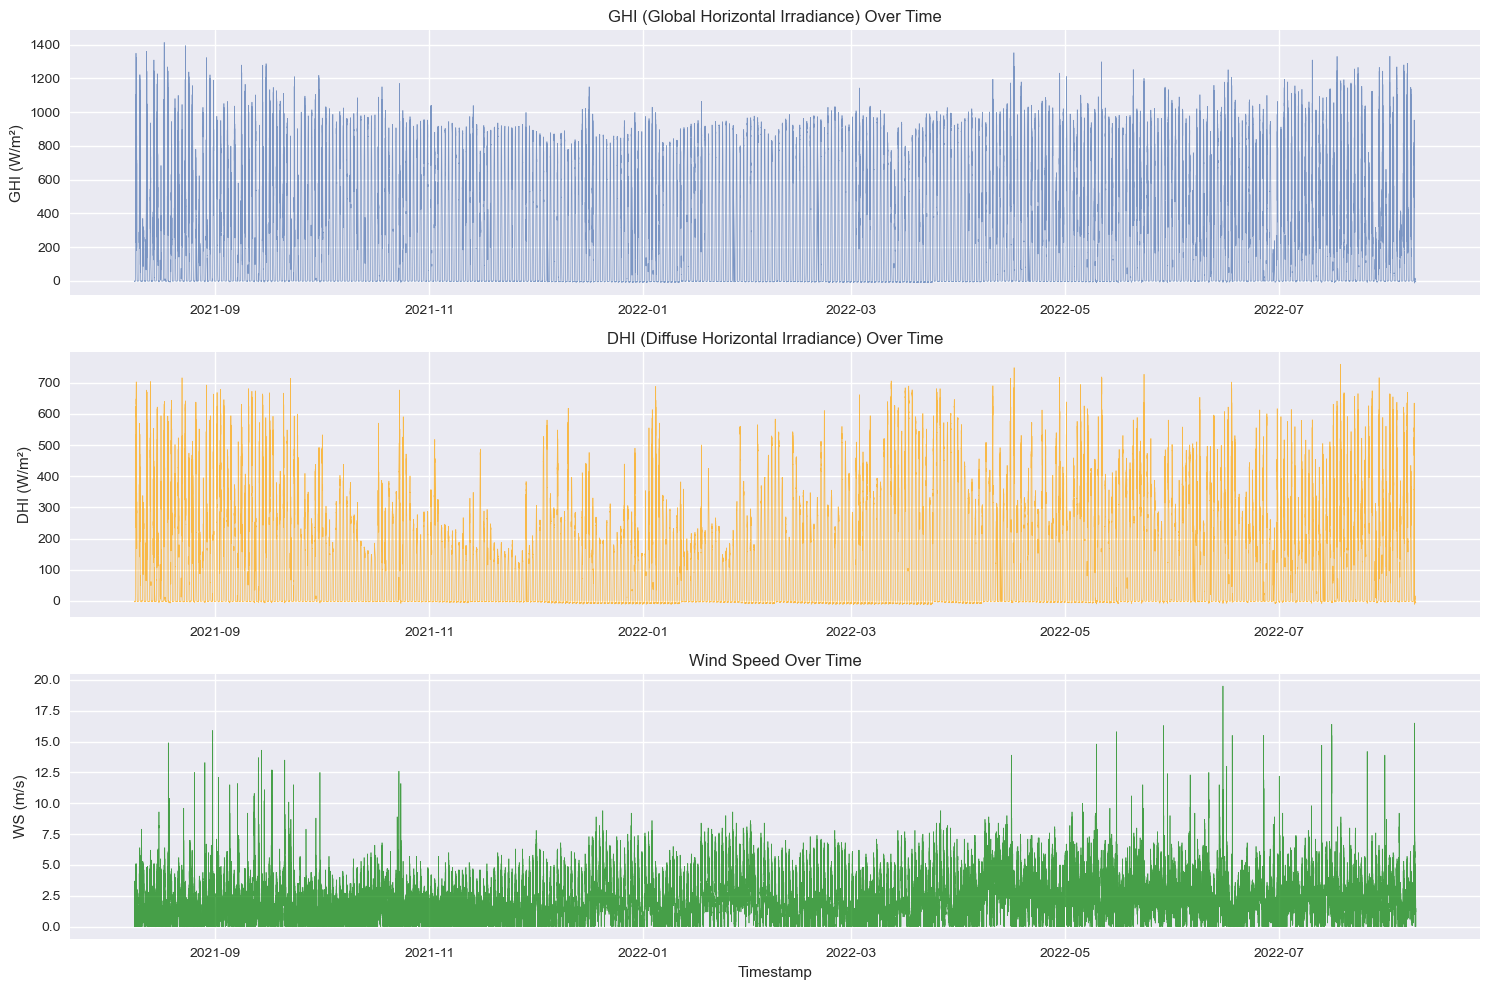

In [45]:
plt.figure(figsize=(15, 10))

# GHI over time
plt.subplot(3, 1, 1)
plt.plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.7, linewidth=0.5)
plt.title('GHI (Global Horizontal Irradiance) Over Time')
plt.ylabel('GHI (W/m²)')

# DHI over time
plt.subplot(3, 1, 2)
plt.plot(df_clean['Timestamp'], df_clean['DHI'], alpha=0.7, color='orange', linewidth=0.5)
plt.title('DHI (Diffuse Horizontal Irradiance) Over Time')
plt.ylabel('DHI (W/m²)')

# WS over time
plt.subplot(3, 1, 3)
plt.plot(df_clean['Timestamp'], df_clean['WS'], alpha=0.7, color='green', linewidth=0.5)
plt.title('Wind Speed Over Time')
plt.ylabel('WS (m/s)')
plt.xlabel('Timestamp')

plt.tight_layout()
plt.show()

In [46]:
# Save with timestamp included
df_clean.to_csv('../data/benin_clean.csv', index=False)
print("Properly cleaned data saved with timestamp!")

Properly cleaned data saved with timestamp!
